# EMA

EMA is a technical indicator that is used to smooth out price action by filtering out the “noise” from random short-term price fluctuations. It is calculated by taking the average price of a security over a specific number of time periods. The EMA is a type of moving average that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average.

In [1]:
import os
import pandas as pd
import numpy as np
import glob
# load all the csv in output raw into one pandas dataframe

def load_data():
    path = os.path.join(os.getcwd(), "output", "raw", "EMA")
    files = glob.glob(os.path.join(path, "*.csv"))
    return pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

df = load_data()

df.head(3)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Instrument,Strategy,StrategyParameters
0,0,2018-04-04,2023-04-03,1825 days,65.528197,61936.2617,119396.30528,-38.063738,66.529542,-9.143512,...,165 days,54 days,0.759125,-1.380037,-0.859636,Equity DrawdownPct DrawdownD...,Size EntryBar ExitBar EntryPrice ExitP...,COO,EMA,NaN
1,0,2018-04-04,2023-04-03,1825 days,57.585385,86926.7535,125941.36544,-13.073247,-18.562470,-2.765357,...,191 days,58 days,0.982479,-0.081061,-0.281949,Equity DrawdownPct DrawdownD...,Size EntryBar ExitBar EntryPrice ExitP...,EMN,EMA,NaN
2,0,2018-04-04,2023-04-03,1825 days,48.371724,132902.8306,154005.29192,32.902831,14.283423,5.858679,...,211 days,80 days,1.768393,3.933192,0.552907,Equity DrawdownPct DrawdownD...,Size EntryBar ExitBar EntryPrice ExitP...,CHTR,EMA,NaN


In [2]:
# get the highest return for each instrument
a = df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5)
a


,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
BTCBUSD,0,2019-06-18,2023-03-31,1382 days,18.872017,393782.593444,393782.593444,293.782593,210.943940,43.581840,...,14.072717,61 days,23 days,6.421473,15.252700,2.629925,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,EMA,NaN
ALB,0,2018-04-04,2023-04-03,1825 days,27.482129,305970.087320,388914.172840,205.970087,138.460699,25.087222,...,7.741782,92 days,33 days,3.644084,8.894928,1.496703,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN
OMGUSD,0,2018-04-05,2023-03-31,1821 days,5.872667,299623.079618,299623.079618,199.623080,-82.153223,24.586789,...,6.667965,20 days,6 days,2.674593,8.083346,1.641231,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,EMA,NaN
BBWI,0,2018-04-04,2023-04-03,1825 days,24.861001,296820.751865,341793.596945,196.820752,18.102277,24.329421,...,10.396978,152 days,41 days,4.199619,12.144339,1.705431,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,EMA,NaN
GRMN,0,2018-04-04,2023-04-03,1825 days,43.526608,293469.383940,299578.283940,193.469384,69.762346,24.047163,...,7.443207,147 days,53 days,6.418448,8.169964,2.503081,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN


In [3]:
# get lowest return for each instrument
df.groupby("Instrument").min().sort_values("Return [%]", ascending=True).head(5)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
BTTBUSD,0,2019-01-31,2023-03-30,1519 days,17.171053,74.426375,205496.79663,-99.925574,30.991736,-82.266158,...,-25.033204,77 days,10 days,0.712491,-3.200965,-0.885432,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,EMA,NaN
UAL,0,2018-04-04,2023-04-03,1825 days,56.235107,17365.384923,104152.04108,-82.634615,-38.062580,-29.560526,...,-5.861406,136 days,35 days,0.331861,-5.265116,-3.278864,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN
NCLH,0,2018-04-04,2023-04-03,1825 days,45.194599,18492.683300,113865.45160,-81.507317,-74.830317,-28.668141,...,-6.286108,125 days,31 days,0.342011,-5.524847,-2.223637,Equity DrawdownPct DrawdownD...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN
LNC,0,2018-04-04,2023-04-03,1825 days,39.555203,21977.753340,101759.75844,-78.022247,-68.599102,-26.159925,...,-6.660355,126 days,32 days,0.273592,-6.063363,-2.968761,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN
CHRW,0,2018-04-04,2023-04-03,1825 days,69.102462,23617.407720,101238.82948,-76.382592,2.808393,-25.088778,...,-6.355222,135 days,57 days,0.163940,-6.081346,-3.678336,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN


In [4]:
# get the highest return for each instrument in a specific smallest duration
df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).sort_values("Duration", ascending=True).head(5)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
OTIS,0,2020-03-19,2023-04-03,1110 days,61.749347,108677.806160,124439.644200,8.677806,93.602530,2.775520,...,1.045565,190 days,86 days,1.458038,1.538884,0.280877,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitPr...,EMA,NaN
CARR,0,2020-03-19,2023-04-03,1110 days,31.462141,111715.075440,138214.606080,11.715075,294.726708,3.711734,...,2.809254,144 days,87 days,1.749367,4.313187,0.259231,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitPr...,EMA,NaN
BTCBUSD,0,2019-06-18,2023-03-31,1382 days,18.872017,393782.593444,393782.593444,293.782593,210.943940,43.581840,...,14.072717,61 days,23 days,6.421473,15.252700,2.629925,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,EMA,NaN
LITUSD,0,2019-04-17,2023-02-17,1402 days,9.408411,70094.968327,100000.000000,-29.905032,653.686050,-8.829490,...,-1.411245,22 days,5 days,0.958374,-0.299730,-0.674739,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Ex...,EMA,NaN
CTVA,0,2019-05-24,2023-04-03,1410 days,41.872428,64225.054580,101737.040800,-35.774945,121.576462,-10.845020,...,-3.349208,140 days,45 days,0.379947,-3.015077,-1.445846,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN


In [5]:
# get the highest return for each instrument for a strategy
df[df["Strategy"] == "EMA"].groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
BTCBUSD,0,2019-06-18,2023-03-31,1382 days,18.872017,393782.593444,393782.593444,293.782593,210.943940,43.581840,...,14.072717,61 days,23 days,6.421473,15.252700,2.629925,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,EMA,NaN
ALB,0,2018-04-04,2023-04-03,1825 days,27.482129,305970.087320,388914.172840,205.970087,138.460699,25.087222,...,7.741782,92 days,33 days,3.644084,8.894928,1.496703,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN
OMGUSD,0,2018-04-05,2023-03-31,1821 days,5.872667,299623.079618,299623.079618,199.623080,-82.153223,24.586789,...,6.667965,20 days,6 days,2.674593,8.083346,1.641231,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,EMA,NaN
BBWI,0,2018-04-04,2023-04-03,1825 days,24.861001,296820.751865,341793.596945,196.820752,18.102277,24.329421,...,10.396978,152 days,41 days,4.199619,12.144339,1.705431,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,EMA,NaN
GRMN,0,2018-04-04,2023-04-03,1825 days,43.526608,293469.383940,299578.283940,193.469384,69.762346,24.047163,...,7.443207,147 days,53 days,6.418448,8.169964,2.503081,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN


In [6]:
df_sorted = df.sort_values("Return [%]", ascending=False)
display(df_sorted.groupby("Instrument").head(5))
pd.DataFrame(df_sorted["Buy & Hold Return [%]"] > df_sorted["Return [%]"])

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Instrument,Strategy,StrategyParameters
294,0,2019-06-18,2023-03-31,1382 days,18.872017,393782.593444,393782.593444,293.782593,210.943940,43.581840,...,61 days,23 days,6.421473,15.252700,2.629925,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,BTCBUSD,EMA,NaN
290,0,2018-04-04,2023-04-03,1825 days,27.482129,305970.087320,388914.172840,205.970087,138.460699,25.087222,...,92 days,33 days,3.644084,8.894928,1.496703,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,ALB,EMA,NaN
403,0,2018-04-05,2023-03-31,1821 days,5.872667,299623.079618,299623.079618,199.623080,-82.153223,24.586789,...,20 days,6 days,2.674593,8.083346,1.641231,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,OMGUSD,EMA,NaN
91,0,2018-04-04,2023-04-03,1825 days,24.861001,296820.751865,341793.596945,196.820752,18.102277,24.329421,...,152 days,41 days,4.199619,12.144339,1.705431,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,BBWI,EMA,NaN
371,0,2018-04-04,2023-04-03,1825 days,43.526608,293469.383940,299578.283940,193.469384,69.762346,24.047163,...,147 days,53 days,6.418448,8.169964,2.503081,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,GRMN,EMA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0,2018-04-04,2023-04-03,1825 days,69.102462,23617.407720,101238.829480,-76.382592,2.808393,-25.088778,...,135 days,57 days,0.163940,-6.081346,-3.678336,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,CHRW,EMA,NaN
74,0,2018-04-04,2023-04-03,1825 days,39.555203,21977.753340,101759.758440,-78.022247,-68.599102,-26.159925,...,126 days,32 days,0.273592,-6.063363,-2.968761,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,LNC,EMA,NaN
155,0,2018-04-04,2023-04-03,1825 days,45.194599,18492.683300,113865.451600,-81.507317,-74.830317,-28.668141,...,125 days,31 days,0.342011,-5.524847,-2.223637,Equity DrawdownPct DrawdownD...,Size EntryBar ExitBar EntryPrice ExitP...,NCLH,EMA,NaN
323,0,2018-04-04,2023-04-03,1825 days,56.235107,17365.384923,104152.041080,-82.634615,-38.062580,-29.560526,...,136 days,35 days,0.331861,-5.265116,-3.278864,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ExitP...,UAL,EMA,NaN


,0
294,False
290,False
403,False
91,False
371,False
...,...
164,True
74,True
155,True
323,True


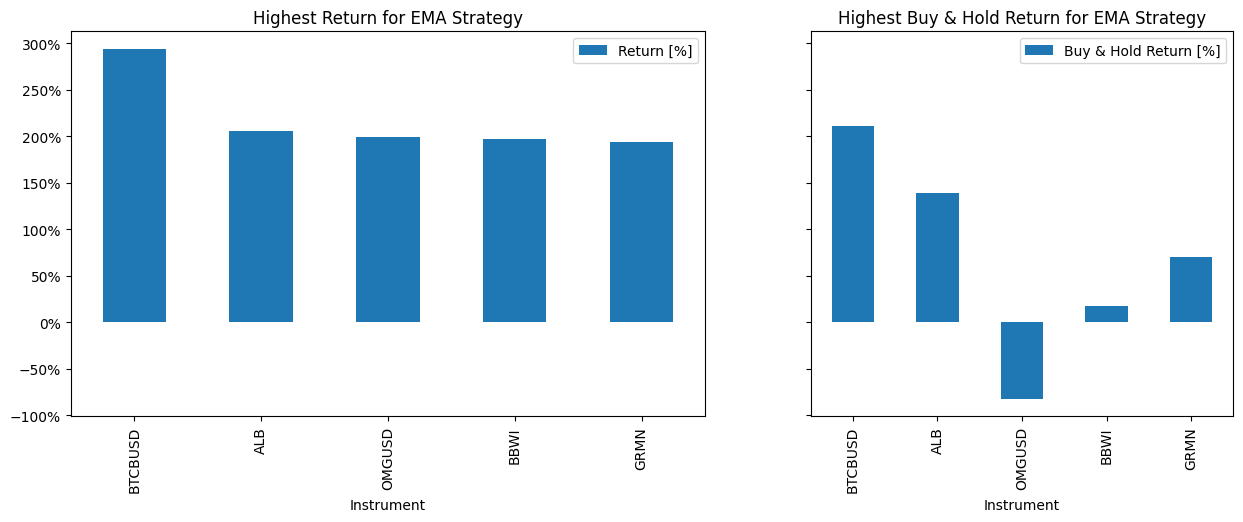

In [7]:
# get the highest return for each instrument for a strategy vs buy and hold in matplotlib bar chart 2 subplots
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# add more space between subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [3, 2]})

df[df["Strategy"] == "EMA"].groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Return [%]", ax=ax1)
df[df["Strategy"] == "EMA"].groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Buy & Hold Return [%]", ax=ax2)

ax1.set_title("Highest Return for EMA Strategy")
ax2.set_title("Highest Buy & Hold Return for EMA Strategy")

ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.show()



In conclusion, the EMA is a trend-following indicator that shows the average price of a security over a specific period of time. The EMA reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

# RSI

RSI is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100. The RSI is considered overbought when above 70 and oversold when below 30.

In [8]:
def load_data():
    path = os.path.join(os.getcwd(), "output", "raw", "RSI")
    files = glob.glob(os.path.join(path, "*.csv"))
    return pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

df = load_data()

df.head(3)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Instrument,Strategy,StrategyParameters
0,0,2018-04-04,2023-04-03,1825 days,90.468626,116550.53214,150158.12114,16.550532,66.529542,3.112999,...,60 days,11 days,1.149201,0.191401,0.306996,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,COO,RSI,NaN
1,0,2018-04-04,2023-04-03,1825 days,85.544083,82650.17030,170614.97776,-17.349830,-18.562470,-3.742273,...,71 days,10 days,0.996496,-0.005590,-0.230495,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,EMN,RSI,NaN
2,0,2018-04-04,2023-04-03,1825 days,91.262907,87044.14840,105565.88844,-12.955852,14.283423,-2.739087,...,59 days,11 days,1.022470,0.037113,-0.286635,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,CHTR,RSI,NaN


In [9]:
# get the highest return for each instrument for a strategy
df[df["Strategy"] == "RSI"].groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
XLMUSD,0,2018-04-05,2023-03-31,1821 days,53.896817,924681.308116,1.286656e+06,824.681308,-43.450035,56.140845,...,1.286527,25 days,6 days,1.601912,1.899339,0.987133,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice E...,RSI,NaN
DOGEUSD,0,2018-04-05,2023-03-31,1821 days,60.922064,833774.815190,9.894086e+05,733.774815,2657.148121,52.937175,...,1.159273,44 days,6 days,1.550112,1.769732,1.006109,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,RSI,NaN
LTCUSD,0,2018-04-05,2023-03-31,1821 days,63.227223,566360.566877,7.413635e+05,466.360567,-24.414876,41.535897,...,0.884468,27 days,6 days,1.433786,1.486408,0.956862,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,RSI,NaN
NVDA,0,2018-04-04,2023-04-03,1825 days,81.413820,534094.326884,5.750062e+05,434.094327,394.430693,39.842500,...,1.195679,50 days,11 days,1.702251,1.561688,1.548783,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,RSI,NaN
NCLH,0,2018-04-04,2023-04-03,1825 days,71.723590,468442.541950,4.973392e+05,368.442542,-74.830317,36.219036,...,1.243199,56 days,11 days,1.663047,1.692049,1.555022,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exi...,RSI,NaN


In [10]:
df_sorted = df.sort_values("Return [%]", ascending=False)
display(df_sorted.groupby("Instrument").head(5))
pd.DataFrame(df_sorted["Buy & Hold Return [%]"] > df_sorted["Return [%]"])

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Instrument,Strategy,StrategyParameters
46,0,2018-04-05,2023-03-31,1821 days,53.896817,924681.308116,1.286656e+06,824.681308,-43.450035,56.140845,...,25 days,6 days,1.601912,1.899339,0.987133,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice E...,XLMUSD,RSI,NaN
215,0,2018-04-05,2023-03-31,1821 days,60.922064,833774.815190,9.894086e+05,733.774815,2657.148121,52.937175,...,44 days,6 days,1.550112,1.769732,1.006109,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,DOGEUSD,RSI,NaN
32,0,2018-04-05,2023-03-31,1821 days,63.227223,566360.566877,7.413635e+05,466.360567,-24.414876,41.535897,...,27 days,6 days,1.433786,1.486408,0.956862,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,LTCUSD,RSI,NaN
79,0,2018-04-04,2023-04-03,1825 days,81.413820,534094.326884,5.750062e+05,434.094327,394.430693,39.842500,...,50 days,11 days,1.702251,1.561688,1.548783,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,NVDA,RSI,NaN
154,0,2018-04-04,2023-04-03,1825 days,71.723590,468442.541950,4.973392e+05,368.442542,-74.830317,36.219036,...,56 days,11 days,1.663047,1.692049,1.555022,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exi...,NCLH,RSI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,2018-04-04,2023-04-03,1825 days,83.320095,10903.299680,1.146809e+05,-89.096700,37.375887,-35.826061,...,56 days,10 days,0.527511,-1.264599,-2.074708,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,META,RSI,NaN
138,0,2018-04-05,2023-03-31,1821 days,65.971460,9449.289312,2.570654e+05,-90.550711,-9.929898,-37.663499,...,32 days,6 days,0.824361,-0.639819,-0.720139,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,XMRUSD,RSI,NaN
419,0,2018-04-04,2023-04-03,1825 days,89.674345,9031.127658,1.048056e+05,-90.968872,76.720084,-38.200849,...,54 days,9 days,0.370007,-1.132924,-3.731416,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,TXN,RSI,NaN
160,0,2018-04-04,2023-04-03,1825 days,86.973789,2243.073721,1.054390e+05,-97.756926,1.813510,-53.236530,...,68 days,10 days,0.307031,-1.969029,-2.649216,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,BIIB,RSI,NaN


,0
46,False
215,True
32,False
79,False
154,False
...,...
123,True
138,True
419,True
160,True


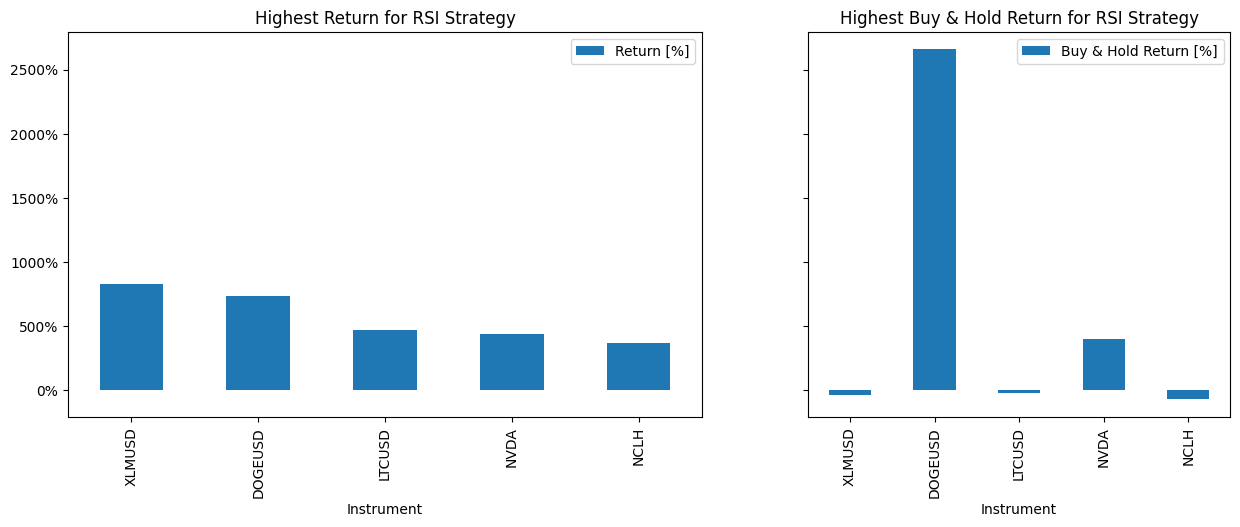

In [11]:
# get the highest return for each instrument for a strategy vs buy and hold in matplotlib bar chart 2 subplots
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [3, 2]})

df[df["Strategy"] == "RSI"].groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Return [%]", ax=ax1)
df[df["Strategy"] == "RSI"].groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Buy & Hold Return [%]", ax=ax2)

ax1.set_title("Highest Return for RSI Strategy")
ax2.set_title("Highest Buy & Hold Return for RSI Strategy")

ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.show()

# Linear Regression

Linear regression is a statistical method that allows us to summarize and study relationships between variables. In finance, linear regression is used to determine the relationship between the price of a security and a variable. The variable can be the price of another security, the price of a commodity, the price of a currency, or even the price of a stock index.

In [12]:
def load_data():
    path = os.path.join(os.getcwd(), "output", "raw", "LinearRegression")
    files = glob.glob(os.path.join(path, "*.csv"))
    return pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

df = load_data()

df.head(3)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Instrument,Strategy,StrategyParameters
0,0,2018-04-04,2023-04-03,1825 days,97.378872,57044.69118,106308.18130,-42.955309,66.529542,-10.627415,...,40 days,9 days,0.858530,-0.206187,-1.168688,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,COO,LinearRegression,NaN
1,0,2018-04-04,2023-04-03,1825 days,96.187450,141342.22128,386420.96714,41.342221,-18.562470,7.171240,...,42 days,10 days,1.196545,0.320635,0.258211,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,EMN,LinearRegression,NaN
2,0,2018-04-04,2023-04-03,1825 days,97.537728,76738.05388,111391.65960,-23.261946,14.283423,-5.161672,...,34 days,10 days,0.983218,-0.026958,-0.443599,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,CHTR,LinearRegression,NaN


In [13]:
# get the highest return for each instrument
df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(3)

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
XLMUSD,0,2018-04-05,2023-03-31,1821 days,80.241493,2.653810e+06,3.724925e+06,2553.810323,-43.450035,92.860313,...,1.244886,23 days,6 days,1.576115,1.795711,0.893627,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,LinearRegression,NaN
XRPUSD,0,2018-04-05,2023-03-31,1821 days,80.241493,2.019745e+06,4.604347e+06,1919.744609,8.983241,82.595107,...,1.195052,22 days,6 days,1.569680,1.740273,0.722161,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice E...,LinearRegression,NaN
DOGEUSD,0,2018-04-05,2023-03-31,1821 days,76.509330,1.769805e+06,1.858788e+06,1669.804828,2657.148121,77.826314,...,1.165389,25 days,6 days,1.545380,1.750648,1.457249,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,LinearRegression,NaN


In [14]:
df_sorted = df.sort_values("Return [%]", ascending=False)
display(df_sorted.groupby("Instrument").head(5))
pd.DataFrame(df_sorted["Buy & Hold Return [%]"] > df_sorted["Return [%]"])

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Instrument,Strategy,StrategyParameters
46,0,2018-04-05,2023-03-31,1821 days,80.241493,2.653810e+06,3.724925e+06,2553.810323,-43.450035,92.860313,...,23 days,6 days,1.576115,1.795711,0.893627,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,XLMUSD,LinearRegression,NaN
190,0,2018-04-05,2023-03-31,1821 days,80.241493,2.019745e+06,4.604347e+06,1919.744609,8.983241,82.595107,...,22 days,6 days,1.569680,1.740273,0.722161,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice E...,XRPUSD,LinearRegression,NaN
215,0,2018-04-05,2023-03-31,1821 days,76.509330,1.769805e+06,1.858788e+06,1669.804828,2657.148121,77.826314,...,25 days,6 days,1.545380,1.750648,1.457249,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,DOGEUSD,LinearRegression,NaN
390,0,2018-04-05,2023-03-31,1821 days,78.924259,8.093213e+05,1.332365e+06,709.321320,49.520273,52.027883,...,17 days,6 days,1.393354,1.375991,1.076024,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,ETCUSD,LinearRegression,NaN
439,0,2018-04-05,2023-03-31,1821 days,74.368825,5.753174e+05,1.382664e+06,475.317354,-73.846306,41.981493,...,20 days,5 days,1.346114,1.264654,0.482553,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,NEOUSD,LinearRegression,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,2018-04-04,2023-04-03,1825 days,96.505163,6.066364e+03,1.003380e+05,-93.933636,41.057195,-42.932040,...,28 days,8 days,0.521247,-1.108599,-3.441286,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,QRVO,LinearRegression,NaN
138,0,2018-04-05,2023-03-31,1821 days,84.028540,5.811397e+03,2.179415e+05,-94.188603,-9.929898,-43.447844,...,21 days,5 days,0.869580,-0.496079,-0.629513,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,XMRUSD,LinearRegression,NaN
43,0,2018-04-04,2023-04-03,1825 days,87.609214,5.118483e+03,1.034586e+05,-94.881517,65.701699,-44.840136,...,28 days,7 days,0.678717,-1.037439,-2.751816,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exit...,MRO,LinearRegression,NaN
159,0,2019-01-31,2023-03-30,1519 days,60.592105,0.000000e+00,4.230131e+05,-100.000000,30.991736,0.000000,...,24 days,5 days,0.008030,-615.387965,-0.999625,Equity DrawdownPct DrawdownDura...,Size EntryBar ExitBar EntryP...,BTTBUSD,LinearRegression,NaN


,0
46,False
190,False
215,True
390,False
439,False
...,...
298,True
138,True
43,True
159,True


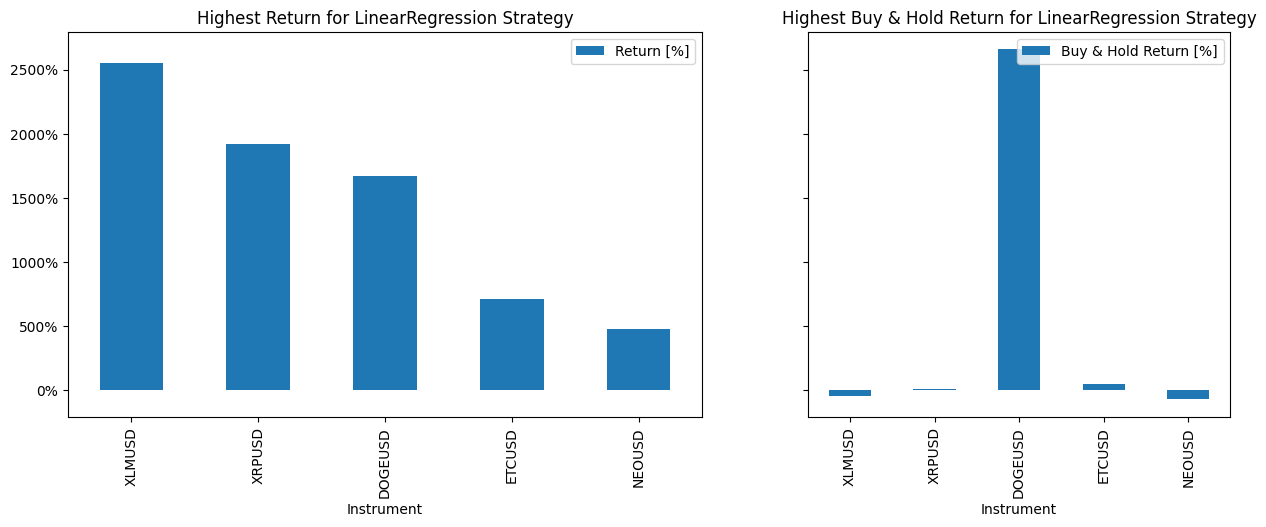

In [15]:
# get the highest return for each instrument for a strategy vs buy and hold in matplotlib bar chart 2 subplots
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [3, 2]})

df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Return [%]", ax=ax1)
df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Buy & Hold Return [%]", ax=ax2)

ax1.set_title("Highest Return for LinearRegression Strategy")
ax2.set_title("Highest Buy & Hold Return for LinearRegression Strategy")

ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.show()

# All

All Strategies is a combination of all the strategies above. It is used to compare the performance of all the strategies at once.

In [16]:
import os
import pandas as pd
import numpy as np
import glob
from IPython.display import display
# load all the csv in output raw into one pandas dataframe

from src.strategies import STRATEGIES_STR

def load_data(strategies: str=STRATEGIES_STR):
    path = os.path.join(os.getcwd(), "output", "raw", strategies)
    files = glob.glob(os.path.join(path, "*.csv"))
    return pd.concat((pd.read_csv(file) for file in files), ignore_index=True)

for strategy in STRATEGIES_STR:
    df = load_data(strategy)
    display(strategy)
    display(df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(3))
    # mean of Return [%] all instruments
    display(df["Return [%]"].mean())
    display(df["Buy & Hold Return [%]"].mean())

'EMA'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
BTCBUSD,0,2019-06-18,2023-03-31,1382 days,18.872017,393782.593444,393782.593444,293.782593,210.943940,43.581840,...,14.072717,61 days,23 days,6.421473,15.252700,2.629925,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,EMA,NaN
ALB,0,2018-04-04,2023-04-03,1825 days,27.482129,305970.087320,388914.172840,205.970087,138.460699,25.087222,...,7.741782,92 days,33 days,3.644084,8.894928,1.496703,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,EMA,NaN
OMGUSD,0,2018-04-05,2023-03-31,1821 days,5.872667,299623.079618,299623.079618,199.623080,-82.153223,24.586789,...,6.667965,20 days,6 days,2.674593,8.083346,1.641231,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,EMA,NaN


-5.45482296260673

80.44058674214065

'RSI'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
XLMUSD,0,2018-04-05,2023-03-31,1821 days,53.896817,924681.308116,1.286656e+06,824.681308,-43.450035,56.140845,...,1.286527,25 days,6 days,1.601912,1.899339,0.987133,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice E...,RSI,NaN
DOGEUSD,0,2018-04-05,2023-03-31,1821 days,60.922064,833774.815190,9.894086e+05,733.774815,2657.148121,52.937175,...,1.159273,44 days,6 days,1.550112,1.769732,1.006109,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ...,RSI,NaN
LTCUSD,0,2018-04-05,2023-03-31,1821 days,63.227223,566360.566877,7.413635e+05,466.360567,-24.414876,41.535897,...,0.884468,27 days,6 days,1.433786,1.486408,0.956862,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,RSI,NaN


-18.704958674451905

78.21583545847096

'BollingerBands'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
STE,0,2018-04-04,2023-04-03,1825 days,84.511517,493426.265020,494849.115020,393.426265,105.124892,37.643141,...,2.791850,133 days,27 days,4.132094,3.075060,2.625774,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,BollingerBands,NaN
HLT,0,2018-04-04,2023-04-03,1825 days,70.293884,385956.330060,420579.586180,285.956330,78.867102,31.039072,...,2.202963,174 days,21 days,2.543002,2.605774,1.977124,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,BollingerBands,NaN
DXCM,0,2018-04-04,2023-04-03,1825 days,51.628276,379963.442575,536702.352295,279.963443,538.802661,30.629258,...,2.600627,96 days,18 days,2.163181,3.250566,1.245178,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,BollingerBands,NaN


15.396720302544677

78.21583545847096

'MACD'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
ZECUSD,0,2018-04-05,2023-03-31,1821 days,24.533480,918199.613323,1.274768e+06,818.199613,-79.298612,55.920969,...,6.950259,71 days,13 days,2.832502,8.321180,1.534785,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,MACD,NaN
DASHUSD,0,2018-04-05,2023-03-31,1821 days,32.436883,701477.154172,1.019760e+06,601.477154,-81.208705,47.734289,...,5.123697,72 days,15 days,2.359086,6.415329,1.201923,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,MACD,NaN
BATUSD,0,2018-04-05,2023-03-31,1821 days,22.886937,678951.187180,1.005800e+06,578.951187,35.090061,46.771469,...,5.625027,50 days,11 days,2.401907,7.026593,1.118846,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Ex...,MACD,NaN


0.8143761438404908

78.21583545847096

'LinearRegression'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
XLMUSD,0,2018-04-05,2023-03-31,1821 days,80.241493,2.653810e+06,3.724925e+06,2553.810323,-43.450035,92.860313,...,1.244886,23 days,6 days,1.576115,1.795711,0.893627,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,LinearRegression,NaN
XRPUSD,0,2018-04-05,2023-03-31,1821 days,80.241493,2.019745e+06,4.604347e+06,1919.744609,8.983241,82.595107,...,1.195052,22 days,6 days,1.569680,1.740273,0.722161,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice E...,LinearRegression,NaN
DOGEUSD,0,2018-04-05,2023-03-31,1821 days,76.509330,1.769805e+06,1.858788e+06,1669.804828,2657.148121,77.826314,...,1.165389,25 days,6 days,1.545380,1.750648,1.457249,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,LinearRegression,NaN


-22.838994205670225

78.21583545847096

'OBV'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy
Instrument,,,,,,,,,,,,,,,,,,,,,
UNIUSD,0,2019-10-21,2023-03-31,1257 days,99.841017,4.706757e+08,1.472537e+09,470575.693837,78214.011061,1063.094019,...,-30.866716,18.035910,1205 days,25 days,1666.377856,5164.592330,1.000171,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice E...,OBV
AIG,0,2018-04-09,2023-04-06,1823 days,99.841144,2.033208e+04,1.395867e+05,-79.667920,-4.005629,-27.301331,...,-12.772869,-0.128294,4 days,2 days,0.890948,-0.096531,-1.125395,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,OBV
AEP,0,2018-04-09,2023-04-06,1823 days,99.841144,2.025799e+04,1.114940e+05,-79.742008,37.738320,-27.354432,...,-7.976070,-0.126831,4 days,2 days,0.801587,-0.115337,-2.116521,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,OBV


4964.060876330539

1149.3965677065564

'AD'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
TSLA,0,2018-04-05,2023-04-04,1825 days,99.841144,158647.043487,171463.904947,58.647043,844.885753,9.677675,...,0.035018,4 days,2 days,1.086394,0.130081,0.461029,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,AD,NaN
OGN,0,2021-05-14,2023-04-04,690 days,99.579832,94779.894835,115509.047663,-5.220105,-26.001924,-2.798427,...,-0.015925,4 days,2 days,1.010023,0.008000,-0.190524,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,AD,NaN
GEHC,0,2022-12-15,2023-04-04,110 days,97.333333,73229.005220,100000.000000,-26.770995,35.983333,-64.897720,...,-0.436075,4 days,2 days,0.665766,-0.387868,-1.282692,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ExitP...,AD,NaN


-93.65195915154167

75.75231112157078

'ADX'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
GEHC,0,2022-12-15,2023-04-04,110 days,61.333333,75172.744320,100000.00000,-24.827256,35.983333,-61.667869,...,-0.625212,4 days,2 days,0.379758,-0.610361,-2.341296,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,ADX,NaN
GEN,0,2018-04-05,2023-04-04,1825 days,97.696585,66393.344536,213402.97057,-33.606655,1243.307087,-7.870937,...,-0.033071,4 days,2 days,3.175401,3.322836,-0.156849,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Ex...,ADX,NaN
LNC,0,2018-04-05,2023-04-04,1825 days,97.696585,46088.110480,134435.58038,-53.911890,-69.736473,-14.362429,...,-0.058312,4 days,2 days,0.993245,-0.007100,-0.653502,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exi...,ADX,NaN


-92.32043576664763

75.75231112157078

'StandardDeviation'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
BTTBUSD,0,2019-01-31,2023-03-30,1519 days,6.250000,4.863009e+07,6.948629e+07,48530.087425,30.991736,341.784782,...,55.568545,20 days,6 days,1438.138895,7448.965654,0.694516,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPr...,StandardDeviation,NaN
IR,0,2018-04-04,2023-04-03,1825 days,1.906275,1.553369e+05,1.553369e+05,55.336913,-31.455786,9.215762,...,24.639101,28 days,17 days,NaN,24.640076,10.879664,Equity DrawdownPct DrawdownD...,Size EntryBar ExitBar EntryPrice ExitPr...,StandardDeviation,NaN
CTRA,0,2018-04-04,2023-04-03,1825 days,1.032566,1.396365e+05,1.396365e+05,39.636466,5.946862,6.911101,...,18.168529,10 days,10 days,NaN,18.283381,2.937653,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,StandardDeviation,NaN


92.4540100476821

78.21583545847096

'EBSW'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
EOSUSD,0,2018-04-05,2023-03-31,1821 days,4.994512,106255.063844,106255.063844,6.255064,-81.404663,1.22286,...,0.761287,38 days,12 days,1.403729,1.222789,0.235048,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,EBSW,NaN
A,0,2018-04-05,2023-04-04,1825 days,0.000000,100000.000000,100000.000000,0.000000,110.429354,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,Equity DrawdownPct DrawdownDur...,"Empty DataFrame\nColumns: [Size, EntryBar, Exi...",EBSW,NaN
MPC,0,2018-04-05,2023-04-04,1825 days,0.000000,100000.000000,100000.000000,0.000000,71.393543,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,Equity DrawdownPct DrawdownDur...,"Empty DataFrame\nColumns: [Size, EntryBar, Exi...",EBSW,NaN


-1.765283392243881

75.75231112157078

'TRIX'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
GEN,0,2018-04-05,2023-04-04,1825 days,96.822875,1.596676e+06,3.959924e+06,1496.676044,1243.307087,74.114324,...,0.227772,4 days,2 days,3.601087,3.604999,0.442146,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Ex...,TRIX,NaN
GEHC,0,2022-12-15,2023-04-04,110 days,46.666667,8.985389e+04,1.000000e+05,-10.146110,35.983333,-30.195419,...,-0.313882,4 days,2 days,0.620926,-0.299188,-1.102436,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,TRIX,NaN
CEG,0,2022-01-19,2023-04-04,440 days,86.842105,4.733511e+04,1.052845e+05,-52.664890,81.000000,-46.204726,...,-0.279164,4 days,2 days,0.781143,-0.244716,-1.701495,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,TRIX,NaN


-88.35028951172117

75.75231112157078

'Aberration'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
GEHC,0,2022-12-15,2023-04-04,110 days,77.333333,63795.544960,100000.00000,-36.204455,35.983333,-77.915093,...,-0.777606,4 days,2 days,0.363081,-0.752538,-2.426615,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,Aberration,NaN
OGN,0,2021-05-14,2023-04-04,690 days,96.428571,40162.863944,100000.00000,-59.837136,-26.001924,-38.303558,...,-0.203328,4 days,2 days,0.788703,-0.182338,-2.327232,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,Aberration,NaN
CEG,0,2022-01-19,2023-04-04,440 days,94.407895,28228.498938,106373.84476,-71.771501,81.000000,-64.953142,...,-0.442319,4 days,2 days,0.663790,-0.407236,-2.766676,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,Aberration,NaN


-96.2253013103555

75.75231112157078

'AroonOscillator'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
MTCH,0,2018-04-05,2023-04-04,1825 days,77.601271,535075.816455,661089.704385,435.075816,203.201507,39.893900,...,1.902527,48 days,16 days,2.123957,4.042709,0.897437,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,AroonOscillator,NaN
EOG,0,2018-04-05,2023-04-04,1825 days,87.450357,506091.202580,574467.945080,406.091203,14.600498,38.343140,...,2.022356,62 days,20 days,2.017994,2.535479,1.366934,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,AroonOscillator,NaN
AAPL,0,2018-04-05,2023-04-04,1825 days,89.118348,480386.200343,480386.200343,380.386200,283.402778,36.907229,...,2.301015,71 days,24 days,2.431094,2.671039,1.948790,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice ExitP...,AroonOscillator,NaN


-0.08104621354614613

75.75231112157078

'SimpleMeanReversion'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
OMGUSD,0,2018-04-05,2023-03-31,1821 days,50.109769,3.970425e+06,5.085776e+06,3870.425201,-82.153223,109.071057,...,2.032113,31 days,5 days,1.822980,2.768840,1.514000,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice E...,SimpleMeanReversion,NaN
LTCUSD,0,2018-04-05,2023-03-31,1821 days,65.477497,2.118953e+06,3.134533e+06,2018.953424,-24.414876,84.357574,...,1.770701,29 days,7 days,1.791151,2.385027,1.193974,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Ex...,SimpleMeanReversion,NaN
ADAUSD,0,2018-04-05,2023-03-31,1821 days,60.976948,1.671439e+06,2.417806e+06,1571.438622,154.411864,75.800806,...,1.775751,32 days,7 days,1.716128,2.470475,1.149089,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice E...,SimpleMeanReversion,NaN


8.577743720975555

75.75231112157078

'MAD'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
GEHC,0,2022-12-15,2023-04-04,110 days,58.666667,71275.608940,103314.369520,-28.724391,35.983333,-67.946051,...,-0.751141,4 days,2 days,0.277315,-0.738809,-2.915312,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,MAD,NaN
CEG,0,2022-01-19,2023-04-04,440 days,89.802632,61198.961031,126237.277520,-38.801039,81.000000,-33.438662,...,-0.182267,4 days,2 days,0.860072,-0.147886,-0.919545,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,MAD,NaN
OGN,0,2021-05-14,2023-04-04,690 days,93.487395,47464.196796,101514.203636,-52.535803,-26.001924,-32.599297,...,-0.172255,4 days,2 days,0.817344,-0.152338,-1.654911,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,MAD,NaN


-93.87138610948334

75.83756936077914

'CDLZ'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
NWL,0,2018-04-05,2023-04-04,1825 days,97.537728,106519.258929,218854.234425,6.519259,-53.546911,1.272139,...,0.007411,4 days,2 days,1.044876,0.040325,0.082656,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,CDLZ,NaN
GEHC,0,2022-12-15,2023-04-04,110 days,58.666667,79440.126100,100248.666760,-20.559874,35.983333,-53.853991,...,-0.528679,4 days,2 days,0.426700,-0.515443,-2.162765,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,CDLZ,NaN
OGN,0,2021-05-14,2023-04-04,690 days,93.487395,66374.190236,100000.000000,-33.625810,-26.001924,-19.505853,...,-0.097000,4 days,2 days,0.902939,-0.076951,-1.260000,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,CDLZ,NaN


-94.05786791308023

75.75231112157078

'MOM'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
GEN,0,2018-04-05,2023-04-04,1825 days,99.046863,232050.706101,799724.553462,132.050706,1243.307087,18.351742,...,0.068770,5 days,2 days,3.289518,3.432856,0.165170,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Ex...,MOM,NaN
GEHC,0,2022-12-15,2023-04-04,110 days,84.000000,92496.671020,123760.403220,-7.503329,35.983333,-23.054415,...,-0.128621,4 days,2 days,0.898565,-0.093751,-0.334962,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,MOM,NaN
OGN,0,2021-05-14,2023-04-04,690 days,97.478992,72377.383607,118386.662467,-27.622616,-26.001924,-15.730171,...,-0.074566,4 days,2 days,0.936946,-0.051493,-0.809124,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,MOM,NaN


-91.97935708232968

75.83756936077914

'FWMA'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy,StrategyParameters
Instrument,,,,,,,,,,,,,,,,,,,,,
OGN,0,2021-05-14,2023-04-04,690 days,97.689076,135247.529244,137373.598264,35.247529,-26.001924,17.333335,...,0.060245,4 days,2 days,1.110874,0.083253,0.723981,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,FWMA,NaN
CTRA,0,2018-04-05,2023-04-04,1825 days,99.126291,74050.157802,961082.913837,-25.949842,4.803671,-5.836093,...,-0.023625,4 days,2 days,1.123381,0.186913,-0.036045,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,FWMA,NaN
CEG,0,2022-01-19,2023-04-04,440 days,96.381579,66813.336884,162619.972120,-33.186663,81.000000,-28.415206,...,-0.139807,4 days,2 days,0.902133,-0.104182,-0.639358,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exit...,FWMA,NaN


-93.44934220763702

75.75231112157078

'DEMA'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy
Instrument,,,,,,,,,,,,,,,,,,,,,
CTRA,0,2018-04-05,2023-04-04,1825 days,88.165210,1.811251e+06,2.213171e+06,1711.250788,4.803671,78.564678,...,-14.117123,1.017962,28 days,6 days,1.846884,1.717939,1.248689,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exi...,DEMA
XLMUSD,0,2018-04-05,2023-03-31,1821 days,89.956092,1.090064e+06,2.156138e+06,990.063828,-43.450035,61.373429,...,-10.591463,0.524087,17 days,4 days,1.343807,0.898152,0.601694,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,DEMA
TRXUSD,0,2018-04-05,2023-03-31,1821 days,88.529089,3.998395e+05,1.153360e+06,299.839484,62.623082,32.000429,...,-10.477183,0.325857,22 days,4 days,1.259420,0.691379,0.373542,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice E...,DEMA


-44.469804668980196

75.57973277548646

'ALMA'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy
Instrument,,,,,,,,,,,,,,,,,,,,,
XLMUSD,0,2018-04-05,2023-03-31,1821 days,71.844127,8.129621e+06,1.091922e+07,8029.621049,-43.450035,141.347643,...,-11.021155,2.019253,34 days,6 days,1.860584,2.668975,1.231128,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ...,ALMA
LTCUSD,0,2018-04-05,2023-03-31,1821 days,77.716795,1.076733e+06,1.213403e+06,976.733111,-24.414876,60.976135,...,-13.037979,1.025238,22 days,6 days,1.469380,1.627270,1.205460,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Ex...,ALMA
OMGUSD,0,2018-04-05,2023-03-31,1821 days,62.678375,8.032806e+05,1.805912e+06,703.280646,-82.153223,51.799885,...,-10.660961,0.906063,22 days,5 days,1.397533,1.694086,0.471769,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Ex...,ALMA


-4.85285719551317

75.57973277548646

'RVGI'

,Unnamed: 0,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Return (Ann.) [%],...,Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_equity_curve,_trades,Strategy
Instrument,,,,,,,,,,,,,,,,,,,,,
PODD,0,2018-04-05,2023-04-04,1825 days,98.332010,115413.280636,166306.077636,15.413281,271.642658,2.910822,...,-16.950091,0.011662,4 days,2 days,1.051116,0.052247,0.181233,Equity DrawdownPct Drawdow...,Size EntryBar ExitBar EntryPrice Exi...,RVGI
GEHC,0,2022-12-15,2023-04-04,110 days,72.000000,92834.848860,101574.856000,-7.165151,35.983333,-22.105091,...,-5.511210,-0.143241,4 days,2 days,0.840449,-0.124214,-0.541498,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice ExitP...,RVGI
FOXA,0,2019-02-26,2023-04-04,1498 days,97.971014,75855.772060,142289.407140,-24.144228,-33.405427,-6.506840,...,-12.137169,-0.028181,4 days,2 days,0.998072,-0.001584,-0.338816,Equity DrawdownPct Drawdown...,Size EntryBar ExitBar EntryPrice Exi...,RVGI


-87.28109823383336

77.90768619780869

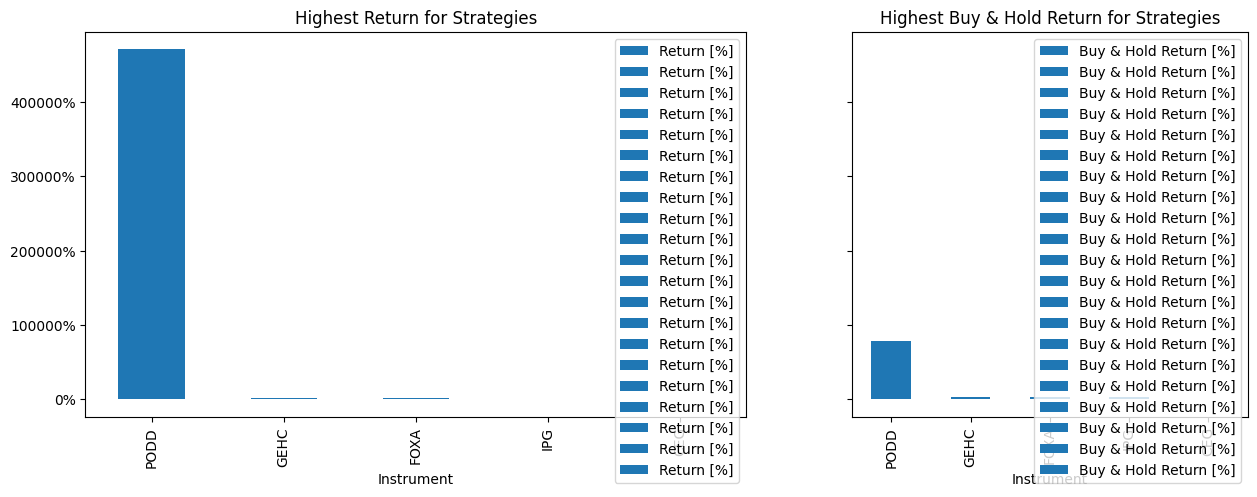

In [20]:
# get the highest return for each instrument for a strategy vs buy and hold in matplotlib bar chart 2 subplots for all strategies
# strategies with highest return and highest buy and hold return for each instrument
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [5, 3]})
for strategy in STRATEGIES_STR:
    df = load_data(strategy)
    df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Return [%]", ax=ax1)
    df.groupby("Instrument").max().sort_values("Return [%]", ascending=False).head(5).plot.bar(y="Buy & Hold Return [%]", ax=ax2)

ax1.set_title("Highest Return for Strategies")
ax2.set_title("Highest Buy & Hold Return for Strategies")

ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.show()